In [1]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# ETTh dataset
df = pd.read_csv("ETTh1.csv", parse_dates=['date'])
df.describe()

date          HUFL          HULL          MUFL  \
count                17420  17420.000000  17420.000000  17420.000000   
mean   2017-06-28 21:30:00      7.375141      2.242242      4.300239   
min    2016-07-01 00:00:00    -22.705999     -4.756000    -25.087999   
25%    2016-12-29 10:45:00      5.827000      0.737000      3.296000   
50%    2017-06-28 21:30:00      8.774000      2.210000      5.970000   
75%    2017-12-27 08:15:00     11.788000      3.684000      8.635000   
max    2018-06-26 19:00:00     23.643999     10.114000     17.341000   
std                    NaN      7.067744      2.042342      6.826978   

               MULL          LUFL          LULL            OT  
count  17420.000000  17420.000000  17420.000000  17420.000000  
mean       0.881568      3.066062      0.856932     13.324672  
min       -5.934000     -1.188000     -1.371000     -4.080000  
25%       -0.284000      2.315000      0.670000      6.964000  
50%        0.959000      2.833000      0.975000     11.396000  
75%        2.203000      3.625000      1.218000     18.079000  
max        7.747000      8.498000      3.046000     46.007000  
std        1.809293      1.164506      0.599552      8.566946

In [3]:
# Student Performance Dataset
df_st = pd.read_csv(r"StudentsPerformance.csv")
df_st.describe()

math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

In [4]:
# Iris Dataset
iris = pd.read_csv(r"Iris.csv")
iris.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

# Line chart

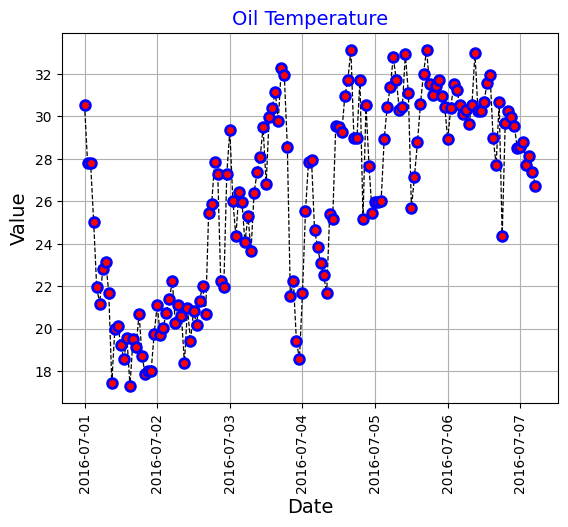

In [5]:
#using matplotlib

plt.plot(df.date[0:150], df.OT[0:150], marker = 'o', color = 'black',
         linewidth = 0.9, linestyle = '--',
         markeredgecolor = 'blue',
         markeredgewidth = '2.0',
         markerfacecolor = 'red', markersize = 7.0)
plt.title('Oil Temperature', color = 'Blue', size = 14)
plt.xlabel('Date', size = 14)
plt.ylabel('Value', size = 14)
plt.style.use('fivethirtyeight')
plt.grid(True)
plt.xticks(rotation = 90)
plt.show()

In [6]:
#using plotly
import plotly.express as px
# Alternative: Don't pass 'df' as the first argument
fig = px.line(x=df.date[0:150], y=df.OT[0:150],
              title='Oil Temperature', markers=True)
fig.update_layout(
    xaxis_title="Date", yaxis_title="Value"
)
fig.show()

(array([16983., 16984., 16985., 16986., 16987., 16988., 16989.]),
 [Text(16983.0, 0, '2016-07-01'),
  Text(16984.0, 0, '2016-07-02'),
  Text(16985.0, 0, '2016-07-03'),
  Text(16986.0, 0, '2016-07-04'),
  Text(16987.0, 0, '2016-07-05'),
  Text(16988.0, 0, '2016-07-06'),
  Text(16989.0, 0, '2016-07-07')])

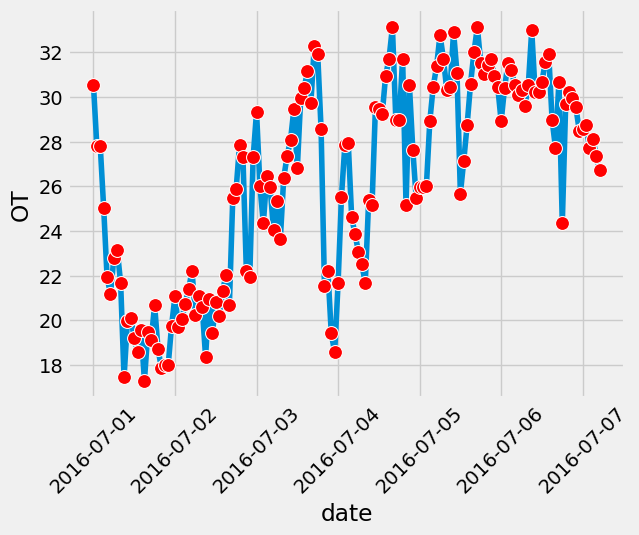

In [7]:
#using seaborn
sns.lineplot(data=df, x=df.date[0:150], y=df.OT[0:150], marker='o',
             markersize=10, markerfacecolor='red')
plt.xticks(rotation=45)


## CONFIGU THE PARAMETER

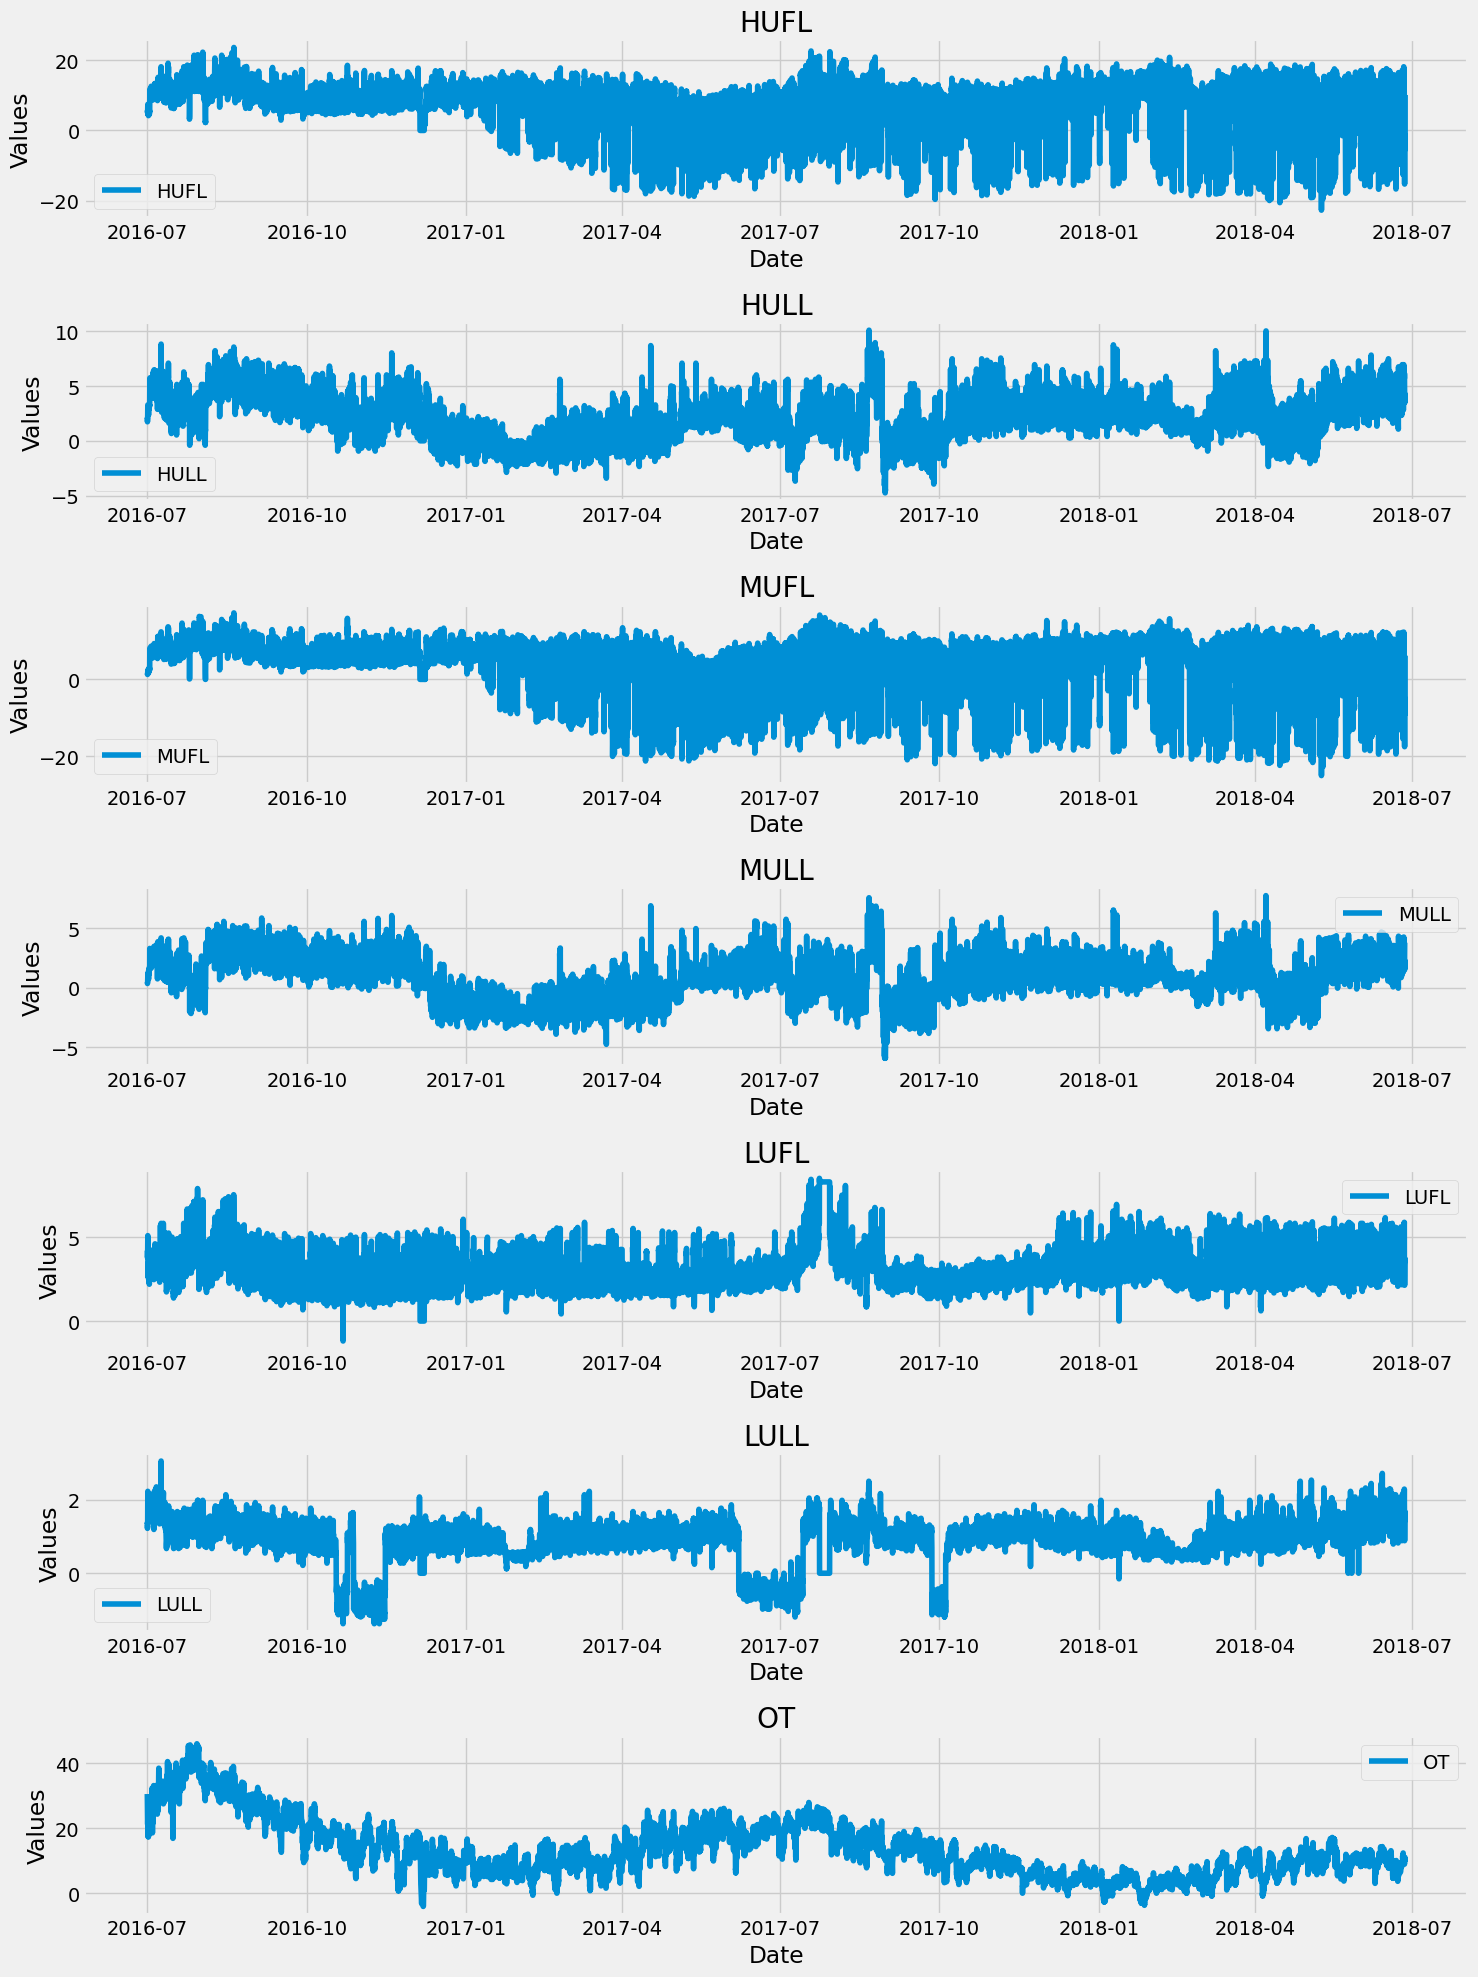

In [8]:
#using matplotlib
# Setting the figure size and layout
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(15, 20))

# Plotting line charts for each variable except 'date'
for i, column in enumerate(df.columns[1:]):
    axes[i].plot(df['date'], df[column], label=column)
    axes[i].set_title(column)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Values')
    axes[i].legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()

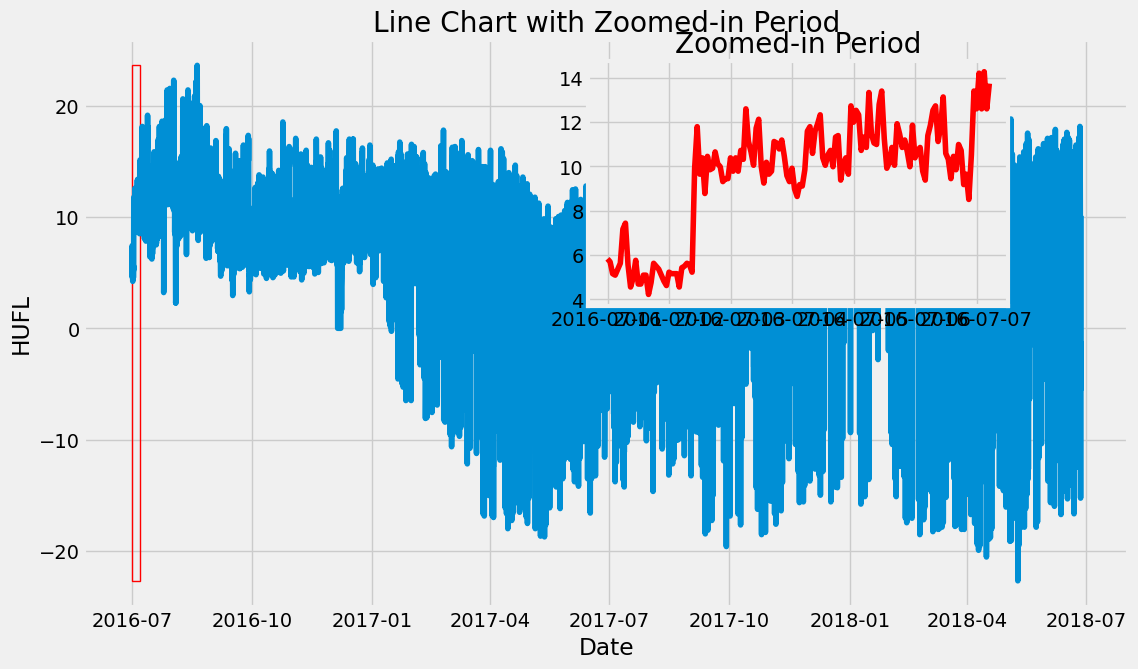

In [11]:
#  selecting a time period to zoom in on
start = 0
end =  150
# Creating the main line chart with a highlighted square
fig, ax = plt.subplots(figsize=(12, 7))
# Plotting the main line chart for a selected variable (example: 'HUFL')
ax.plot(df['date'], df['HUFL'], label='HUFL')
# Adding a rectangle to highlight the zoomed-in area
rect = plt.Rectangle((df['date'][start], min(df['HUFL'])),
                     df['date'][end] - df['date'][start],
                     max(df['HUFL']) - min(df['HUFL']),
                     linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
# Creating an inset (zoomed-in) plot within the main plot
ax_inset = fig.add_axes([0.5, 0.5, 0.35, 0.35])  # [left, bottom, width, height]
ax_inset.plot(df['date'][start:end], df['HUFL'][start:end], color='r')
ax_inset.set_title('Zoomed-in Period')
# Setting labels and title for the main plot
ax.set_xlabel('Date')
ax.set_ylabel('HUFL')
ax.set_title('Line Chart with Zoomed-in Period')
# Display the plot
plt.show()


# BOX PLOTS

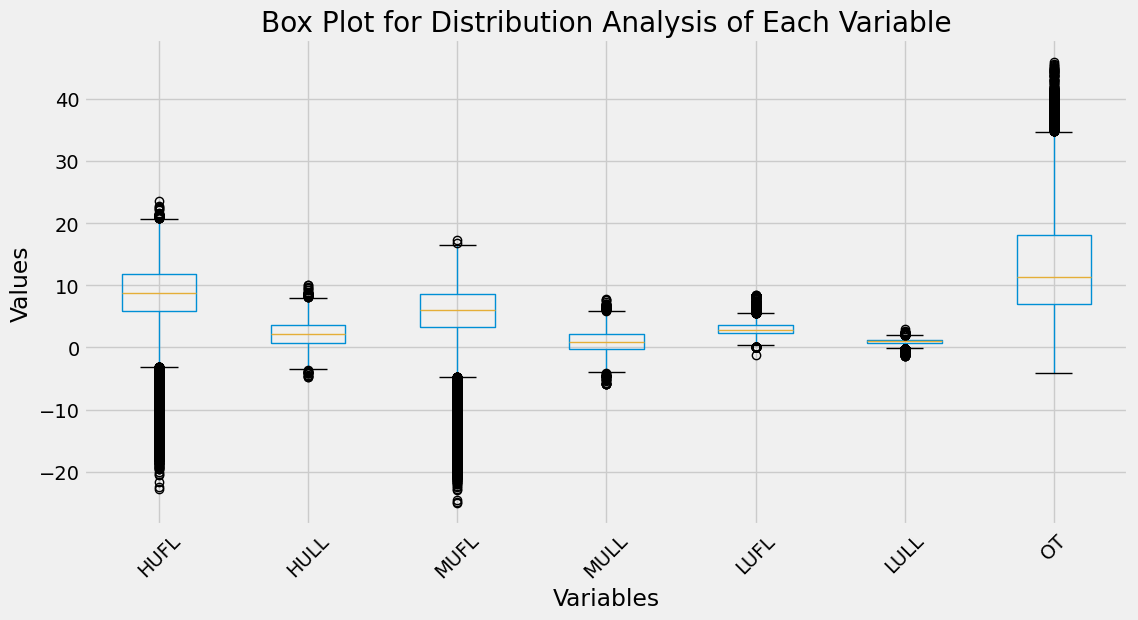

In [12]:
# Creating Box Plots for Distribution Analysis of each variable
plt.figure(figsize=(12, 6))
df.boxplot(column=['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL', 'OT'])
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Box Plot for Distribution Analysis of Each Variable')
plt.xticks(rotation=45)
plt.show()

## BAR CHART

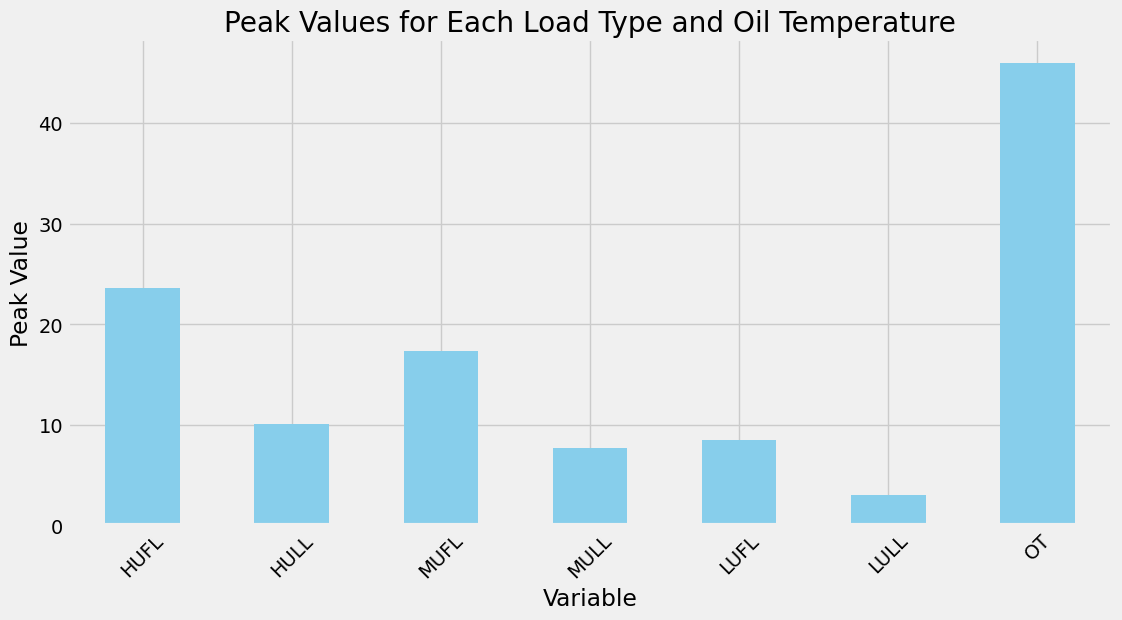

In [13]:
# Use matplotlib
# Identifying peak values and their corresponding times for each column
peak_values = df.max()
peak_times = df.idxmax()

# Creating a DataFrame to display peak values and their times
peak_analysis = pd.DataFrame({'Peak Value': peak_values, 'Peak Time': peak_times})

# Dropping the 'date' column as it's not a load or temperature type
peak_analysis = peak_analysis.drop('date')

# Plotting the peak values for visual representation
plt.figure(figsize=(12, 6))
peak_analysis['Peak Value'].plot(kind='bar', color='skyblue')
plt.title('Peak Values for Each Load Type and Oil Temperature')
plt.xlabel('Variable')
plt.ylabel('Peak Value')
plt.xticks(rotation=45)
plt.show()

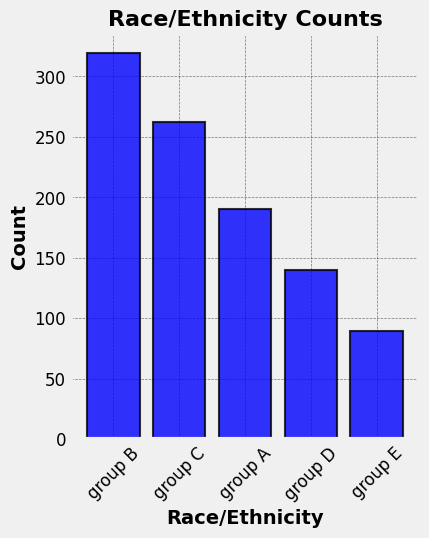

In [ ]:
# Student Performance Data from Kaggle
fig = plt.figure(figsize=(4, 5))
plt.style.use('fivethirtyeight')
plt.bar(
    x=df_st["race/ethnicity"].unique(),
    height=df_st["race/ethnicity"].value_counts().to_list(),
    color='blue',         # Set the color of the bars
    edgecolor='black',    # Set the color of the bar edges
    linewidth=1.5,        # Set the width of the bar edges
    alpha=0.8             # Set the transparency of the bars
)

plt.xlabel('Race/Ethnicity', fontsize=14, fontweight='bold')  # Set the x-axis label with font size and style
plt.ylabel('Count', fontsize=14, fontweight='bold')           # Set the y-axis label with font size and style
plt.title('Race/Ethnicity Counts', fontsize=16, fontweight='bold')  # Set the chart title with font size and style
plt.xticks(fontsize=12, rotation = 45)    # Set the font size of the x-axis tick labels
plt.yticks(fontsize=12)    # Set the font size of the y-axis tick labels
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5, color = "black")  # Display gridlines with a dashed style and reduced opacity

plt.show()

## STACKED BAR CHART

In [15]:
grouped_data = df_st.groupby(['race/ethnicity', 'gender']).size().unstack()
grouped_data


gender          female  male
race/ethnicity              
group A             36    53
group B            104    86
group C            180   139
group D            129   133
group E             69    71

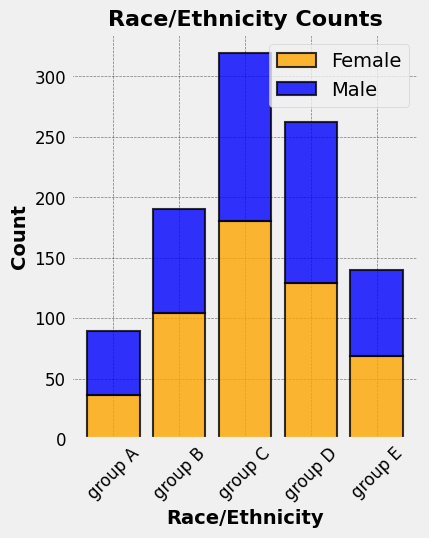

In [16]:
fig = plt.figure(figsize=(4, 5))
plt.style.use('fivethirtyeight')
plt.bar(
    x=grouped_data.index,
    height= grouped_data["female"],
    label = "Female",
    color='orange',      # Set the color of the bars
    edgecolor='black',    # Set the color of the bar edges
    linewidth=1.5,        # Set the width of the bar edges
    alpha=0.8             # Set the transparency of the bars
)

plt.bar(
    x=grouped_data.index,
    height= grouped_data["male"],
    bottom = grouped_data["female"],
    label = "Male",
    color='blue',      # Set the color of the bars
    edgecolor='black',    # Set the color of the bar edges
    linewidth=1.5,        # Set the width of the bar edges
    alpha=0.8             # Set the transparency of the bars
)

plt.xlabel('Race/Ethnicity', fontsize=14, fontweight='bold')  # Set the x-axis label with font size and style
plt.ylabel('Count', fontsize=14, fontweight='bold')           # Set the y-axis label with font size and style
plt.title('Race/Ethnicity Counts', fontsize=16, fontweight='bold')  # Set the chart title with font size and style
plt.xticks(fontsize=12, rotation = 45)    # Set the font size of the x-axis tick labels
plt.yticks(fontsize=12)    # Set the font size of the y-axis tick labels
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5, color = "black")# Display gridlines with a dashed style and reduced opacity
plt.legend()

plt.show()

# COUNT PLOTS

<Axes: xlabel='race/ethnicity', ylabel='count'>

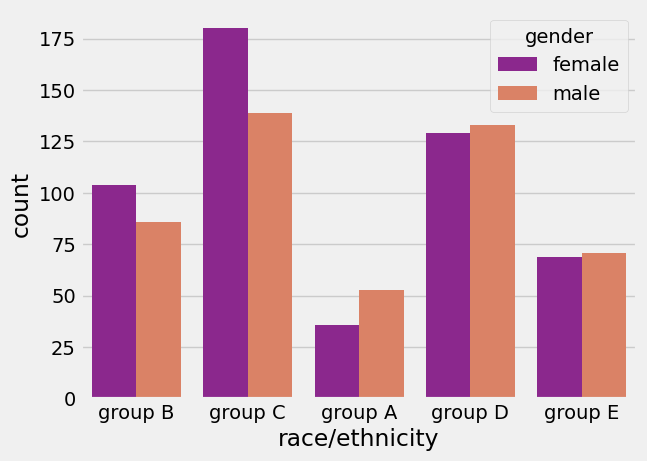

In [17]:
# Seaborn
sns.countplot(data = df_st, x = "race/ethnicity", hue = "gender",
              palette = "plasma")

# HISTOGRAM

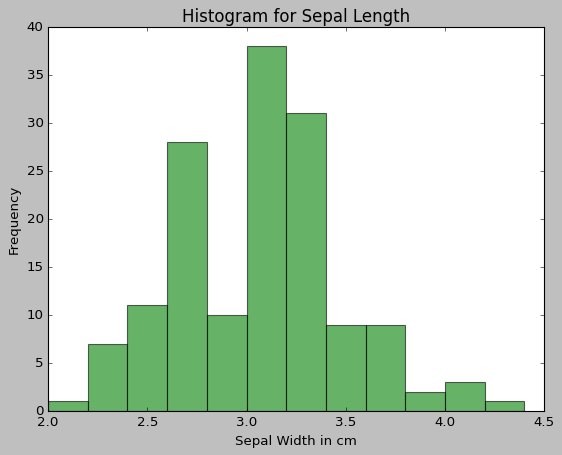

In [19]:
iris = pd.read_csv("./Iris.csv")

# If bins of specific width are needed
bin_width = 0.2
bins = int((iris.SepalWidthCm.max()-iris.SepalWidthCm.min())/bin_width)
plt.style.use('classic')
plt.hist(iris.SepalWidthCm, bins = bins, color = "green", alpha = 0.6,
         orientation = "vertical", rwidth = 1)
plt.xlabel("Sepal Width in cm", size = 12, color = "black")
plt.ylabel("Frequency", size = 12, color = "black")
plt.title("Histogram for Sepal Length", size =15, color = "black")
plt.xticks(color = "black")
plt.yticks(color = "black")
plt.show()

# HEAT MAP

<Axes: >

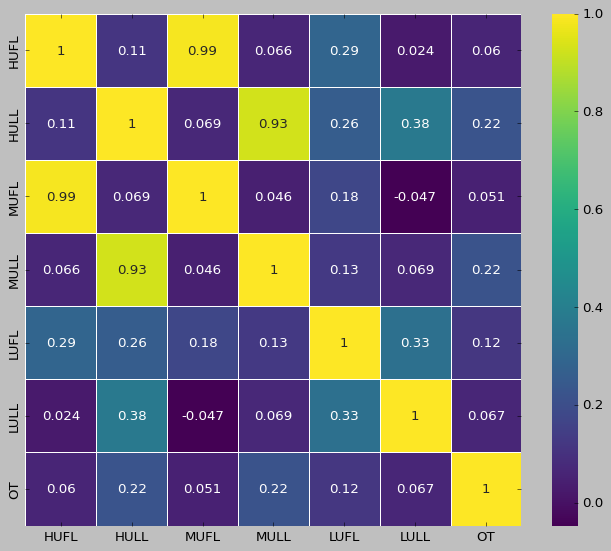

In [20]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=0.5)

# PIE CHART

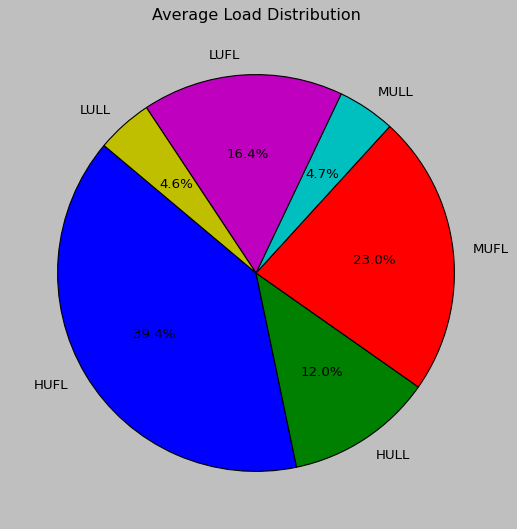

In [22]:
"""
Here is the pie chart showing the distribution of average loads for
each load type (High Useful Load - HUFL, High Useless Load - HULL, Middle Useful Load - MUFL, Middle Useless Load - MULL, Low Useful Load - LUFL, Low Useless Load - LULL).
Each segment of the pie represents the average proportion of a specific load type relative to the total average load.
This visualization helps in understanding the relative contribution of each load type to the overall load in the dataset.
"""

# Calculating the average of each load type for the pie chart
average_loads = df[['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL']].mean()

# Setting up the figure for the pie chart
plt.figure(figsize=(8, 8))

# Creating the pie chart
plt.pie(average_loads, labels=average_loads.index, autopct='%1.1f%%', startangle=140)

# Adding a title
plt.title('Average Load Distribution')

# Display the plot
plt.show()

# SCATTER CHART

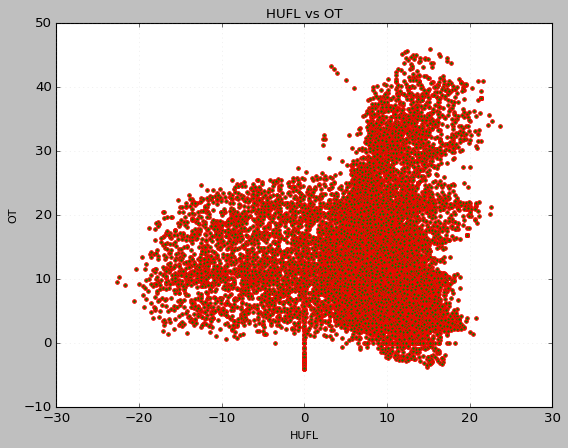

In [23]:
plt.scatter(df.HUFL, df.OT, marker = "o",
            color = "green", linewidths = 1, edgecolors = "red", s = 10)
plt.style.use('fivethirtyeight')
plt.xlabel("HUFL", size = 10, color = "black")
plt.ylabel("OT", size = 10, color = "black")
plt.title("HUFL vs OT", size =12, color = "black")
plt.xticks(color = "black")
plt.yticks(color = "black")
plt.grid(color = "grey", alpha = 0.2)
plt.show()

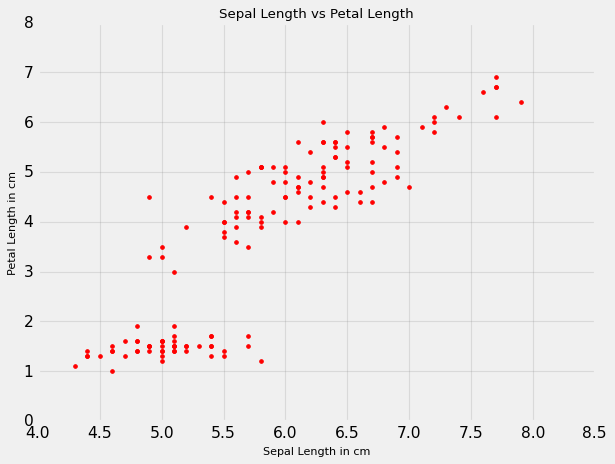

In [ ]:
# Using matplotlib
plt.scatter(iris.SepalLengthCm, iris.PetalLengthCm, marker = "o", color = "red", linewidths = 1, edgecolors = "red", s = 10)
plt.style.use('fivethirtyeight')
plt.xlabel("Sepal Length in cm", size = 10, color = "black")
plt.ylabel("Petal Length in cm", size = 10, color = "black")
plt.title("Sepal Length vs Petal Length", size =12, color = "black")
plt.xticks(color = "black")
plt.yticks(color = "black")
plt.grid(color = "grey", alpha = 0.2)
plt.show()

# BUBBLE CHART

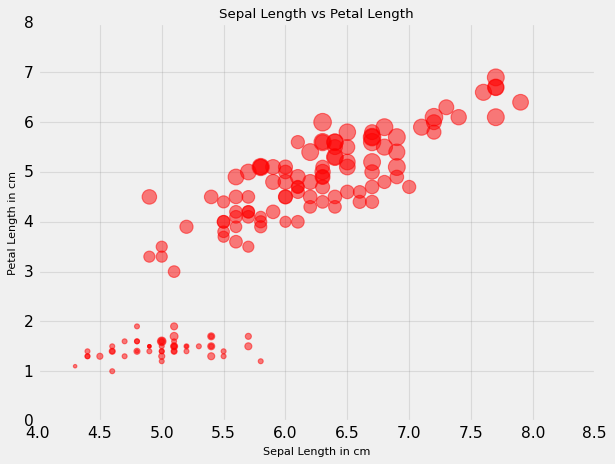

In [25]:
from sklearn.preprocessing import MinMaxScaler

sizes = iris['PetalWidthCm']/iris['PetalWidthCm'].max()

# Here, the size of the bubble will show the Petal Width

plt.figure()
plt.scatter(iris.SepalLengthCm, iris.PetalLengthCm, marker = "o",
            color = "red", linewidths = 1, edgecolors = "red",
            s= sizes*250, alpha = 0.5)
plt.style.use('fivethirtyeight')
plt.xlabel("Sepal Length in cm", size = 10, color = "black")
plt.ylabel("Petal Length in cm", size = 10, color = "black")
plt.title("Sepal Length vs Petal Length", size =12, color = "black")
plt.xticks(color = "black")
plt.yticks(color = "black")
plt.grid(color = "grey", alpha = 0.2)
plt.show()

# PLOTLY SCATTER

In [26]:
import plotly.express as px
fig = px.scatter(iris, x="SepalLengthCm", y="PetalLengthCm", color="Species",
                 size=sizes, hover_data=['PetalWidthCm'])
fig.show()

# KD PLOT

<Axes: xlabel='SepalLengthCm', ylabel='Density'>

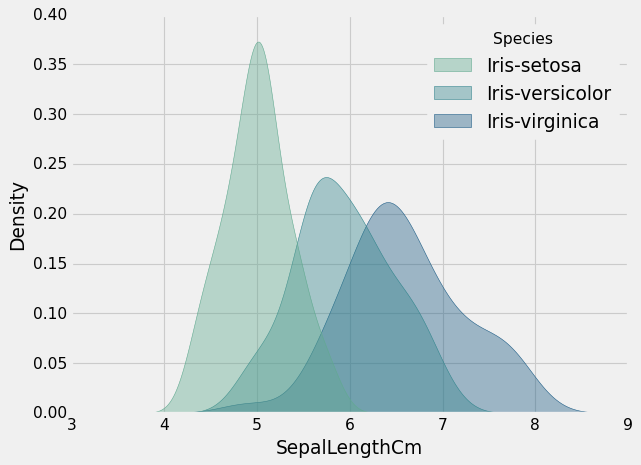

In [27]:
sns.kdeplot(x=iris["SepalLengthCm"], hue = iris["Species"],
            linewidth = 0.5, fill = True, multiple = "layer", cbar = True,
            palette = "crest", alpha = 0.4)

# CREATING BIVARIATE KDE PLOT

/tmp/ipykernel_63844/576106140.py:1: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/home/heigatvu/miniconda3/envs/aio2024/lib/python3.10/site-packages/seaborn/distributions.py:1176: UserWarning:

The following kwargs were not used by contour: 'linewidth'



<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

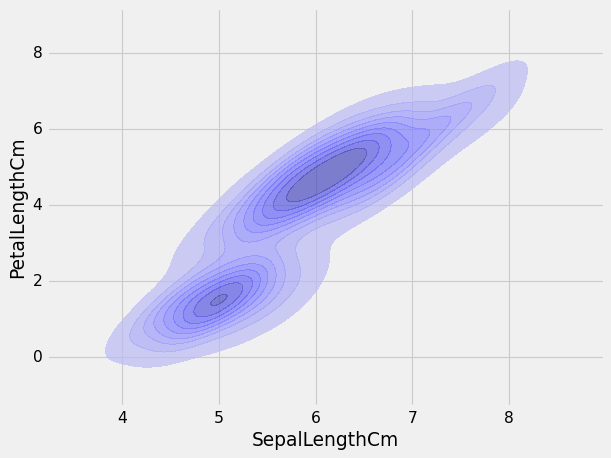

In [28]:
sns.kdeplot(x=iris["SepalLengthCm"], y = iris["PetalLengthCm"], linewidth = 0.5, fill = True, multiple = "layer", cbar = False,
           palette = "crest", alpha = 0.7)

# DISPLOT

/tmp/ipykernel_63844/886953320.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='SepalWidthCm', ylabel='Density'>

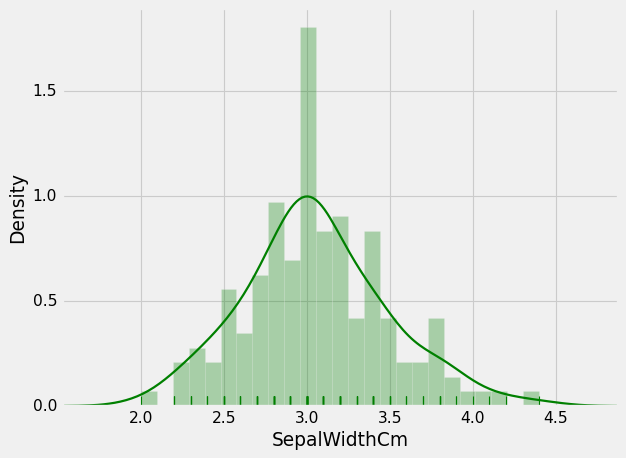

In [29]:
sns.distplot(iris["SepalWidthCm"], bins = 25, kde = True,
             rug = True, color = "green", hist_kws = {"alpha":0.3},
             kde_kws = {"linewidth":2})

# PAIR PLOT

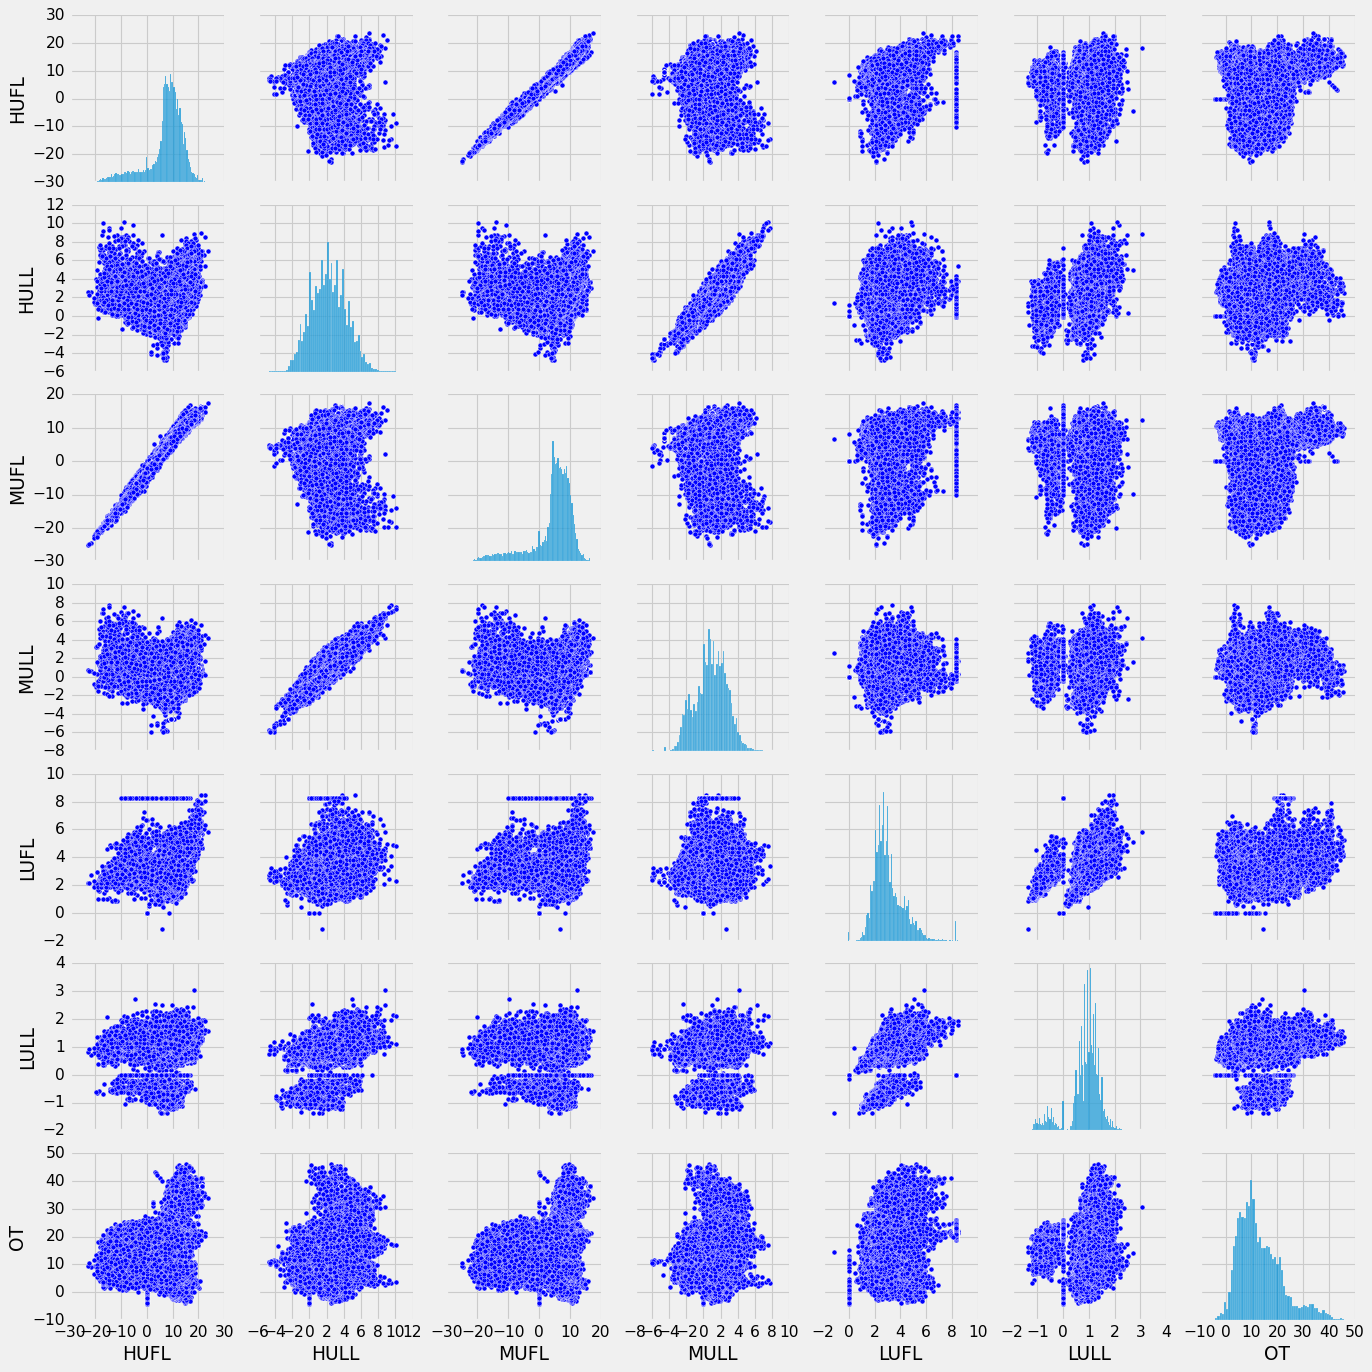

In [30]:
sns.pairplot(df)

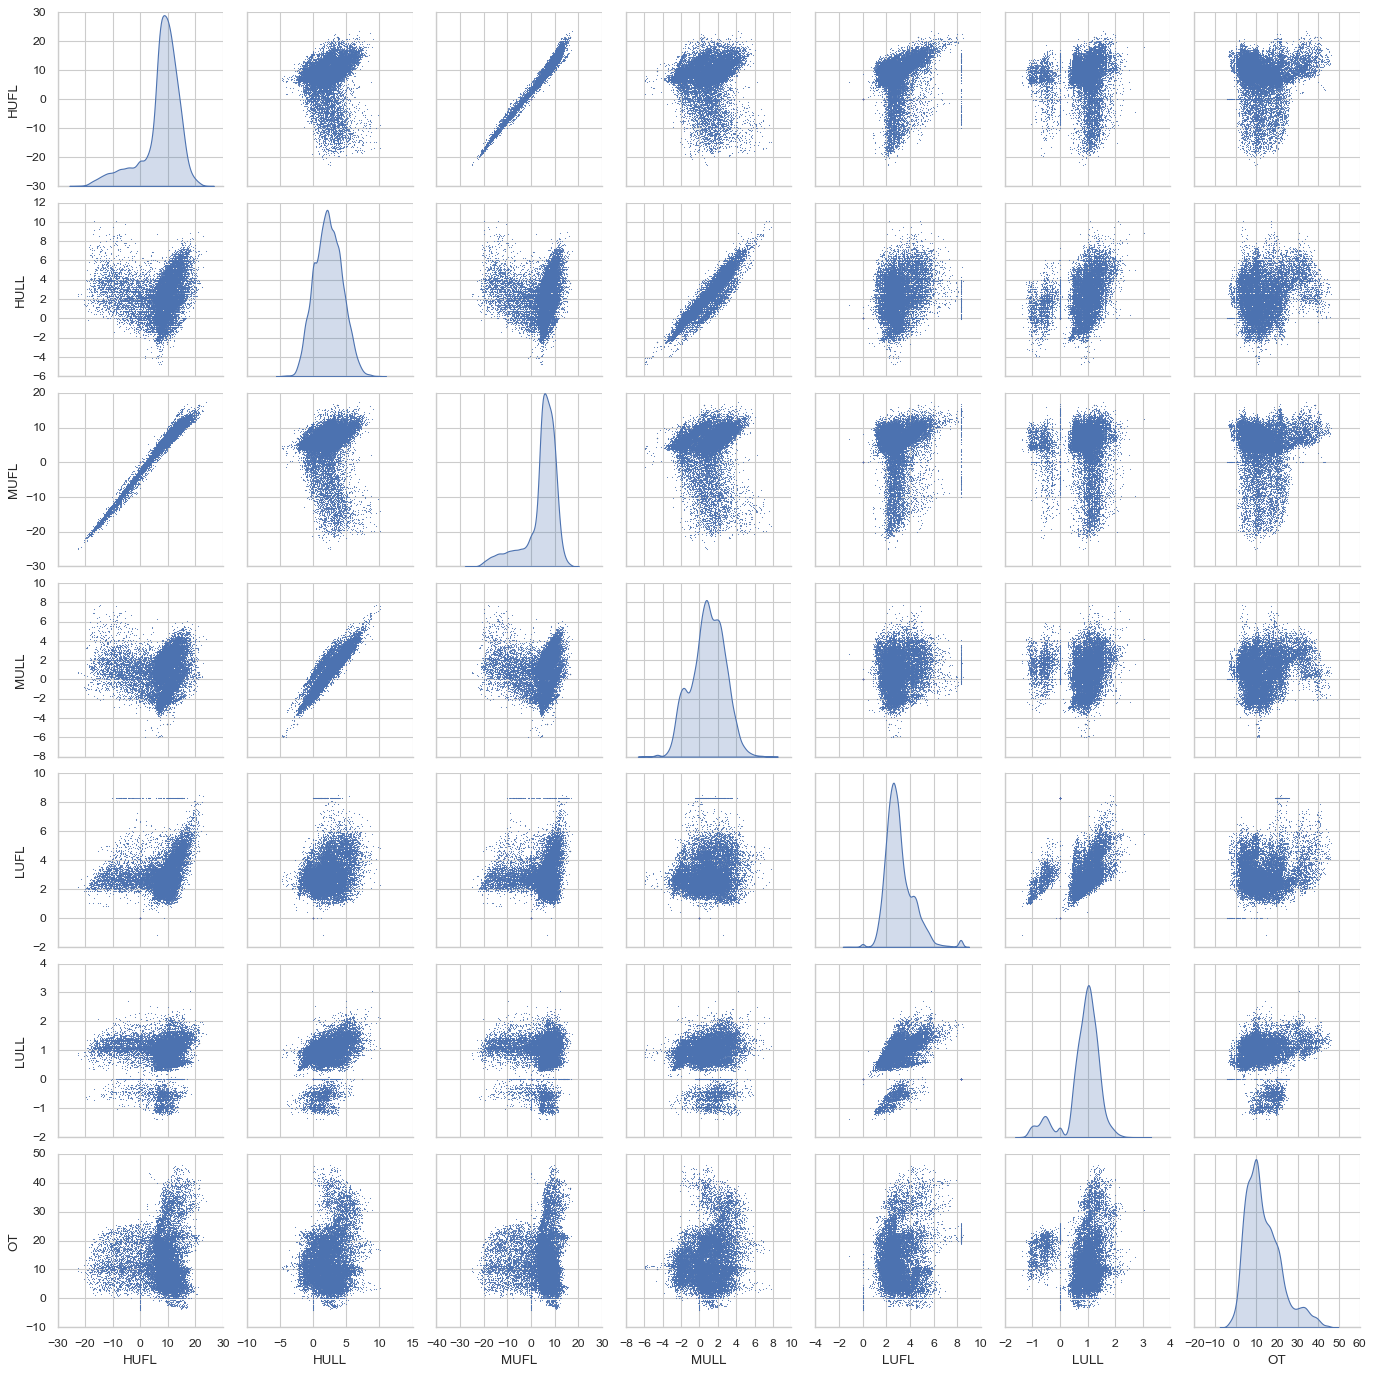

In [31]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating the pair plot with custom settings
pair_plot = sns.pairplot(df,
                         diag_kind="kde", # Kernel density estimate for diagonal
                         markers="o",     # Custom marker style
                         plot_kws=dict(linewidth=0, s=0.9), # line width and size of marker for scatter plots
                         diag_kws=dict(fill=True)) # Shade for KDE plots

# Enhancing aesthetics with despine
sns.despine()

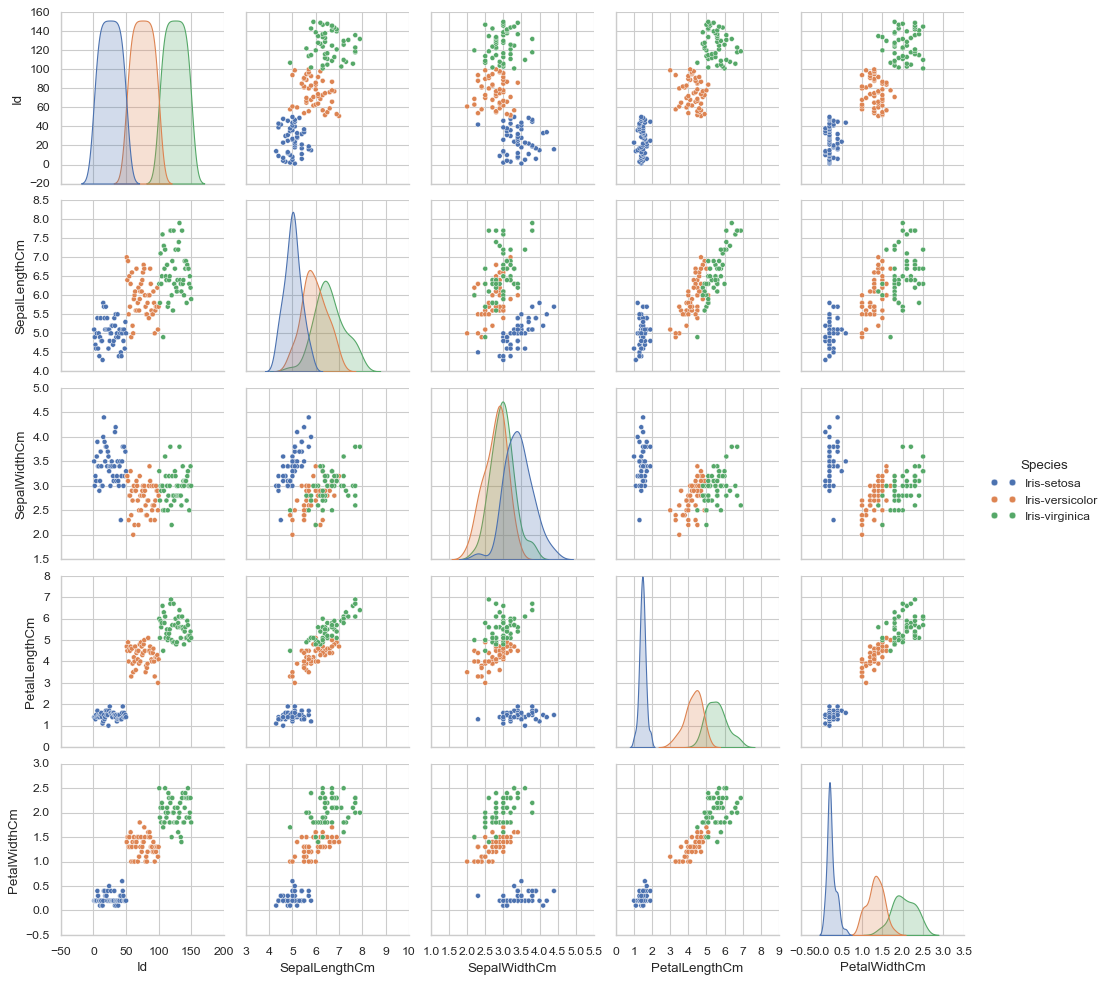

In [32]:
sns.pairplot(data=iris, hue = "Species", corner = False,
             diag_kws = {"linewidth":1, "fill":True},
             plot_kws = dict(marker = "o"))

# kind{‘scatter’, ‘kde’, ‘hist’, ‘reg’}

# 3D VISUALIZATION

Text(0.5, 0, 'PetalLength in cm')

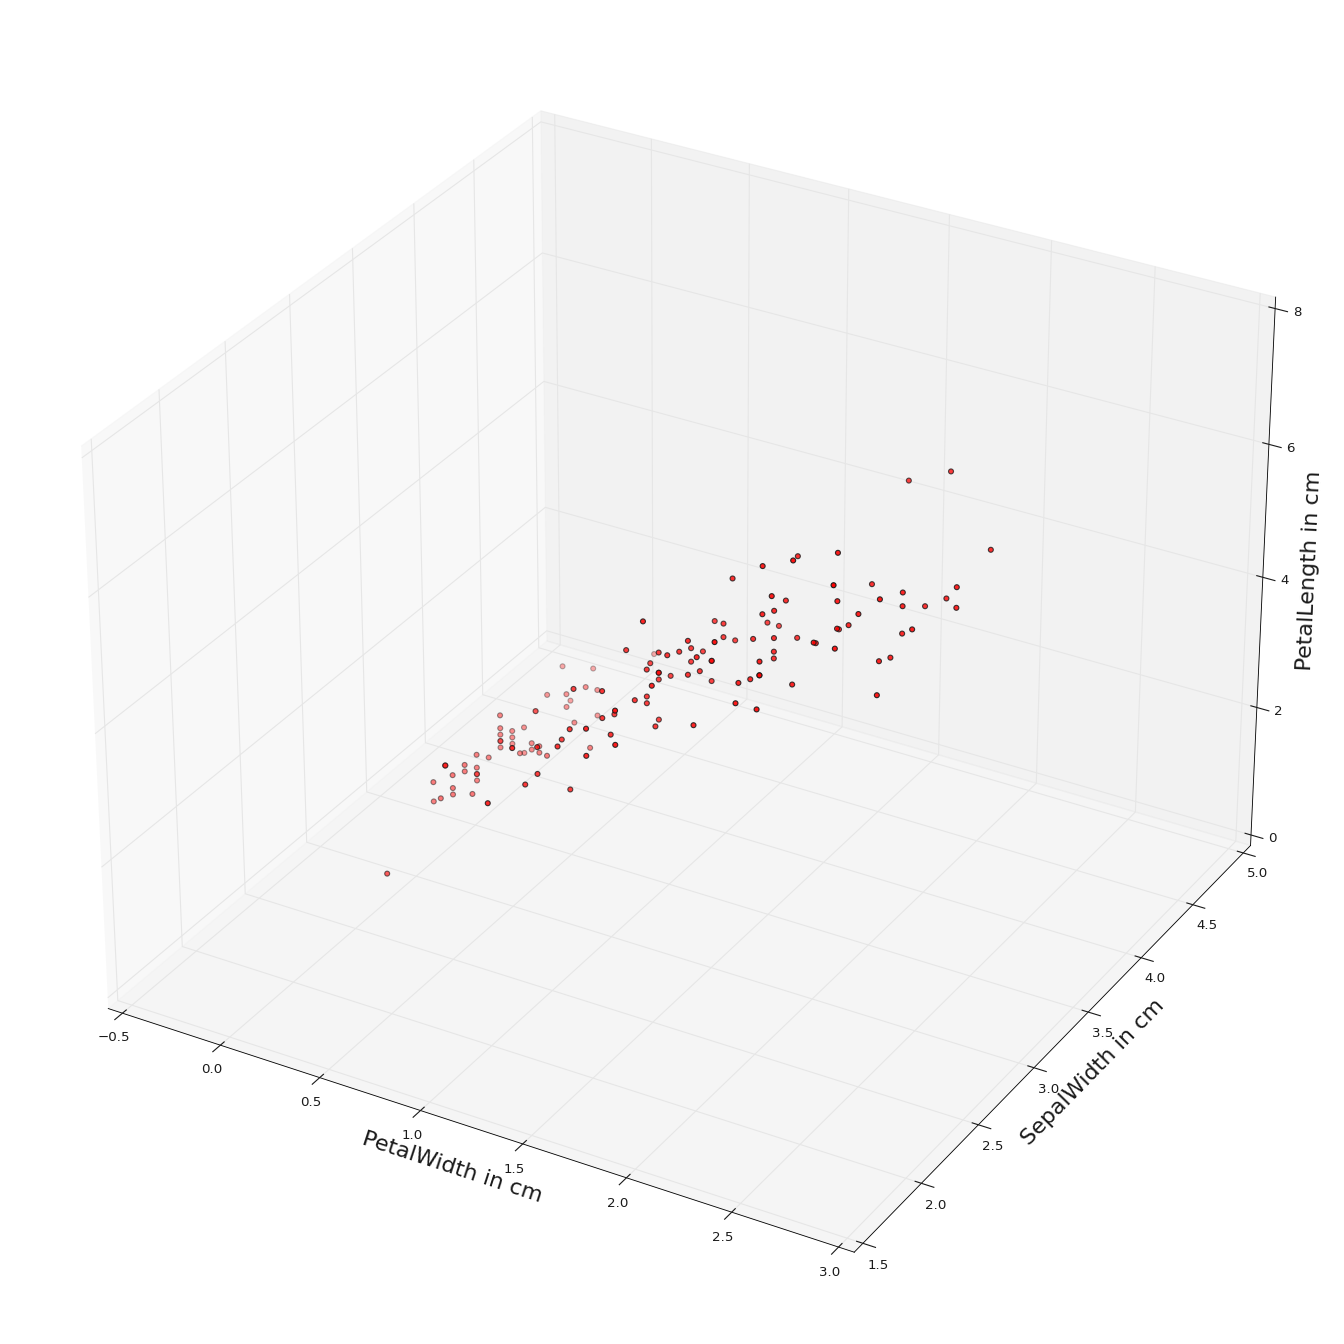

In [33]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (20,20))
plt.style.use("classic")
ax = fig.add_subplot(111, projection='3d')
ax.scatter(iris["PetalWidthCm"], iris["SepalWidthCm"],iris["PetalLengthCm"], c = "red")
ax.set_xlabel("PetalWidth in cm", fontsize = 20)
ax.set_ylabel("SepalWidth in cm", fontsize = 20)
ax.set_zlabel("PetalLength in cm", fontsize = 20)

# WORD CLOUD

In [34]:
import pandas as pd

df_fs = pd.read_csv('./five_star_reviews.csv')

df_fs.head()

Rating                                             Review
0       5  You have to improve the camera performance, an...
1       5  It keeps hanging up completely phone(S10+) and...
2       5  Perfect for virtual conversation. We suggest t...
3       5  A very decent experience i've gained using the...
4       5  This app is very good as everyone knows. Here ...

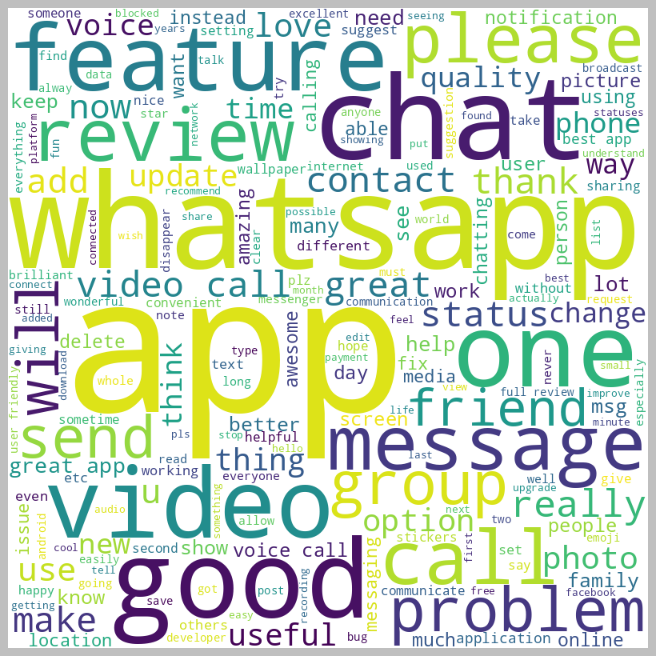

In [36]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

stopwords = set(STOPWORDS)
words = ''
for review in df_fs.Review:
    tokens = str(review).split()
    tokens = [i.lower() for i in tokens]
    words += ' '.join(tokens) + ' '

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [38]:
import pandas as pd

df_os = pd.read_csv('./one_star_reviews.csv')

df_os.head()

Rating                                             Review
0       1  Latest update broke the photo taking function....
1       1  It was one of my favourite app. Easy and secur...
2       1  WhatsApp has a major glitch or bug that is hor...
3       1  It was a good app for communication but it is ...
4       1  A almost a year passed and the bug I reported ...

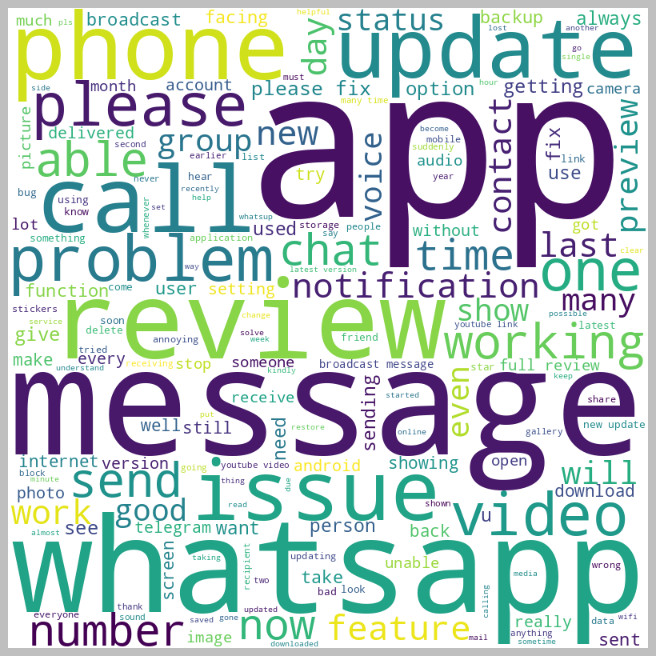

In [39]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

stopwords = set(STOPWORDS)
words = ''
for review in df_os.Review:
    tokens = str(review).split()
    tokens = [i.lower() for i in tokens]
    words += ' '.join(tokens) + ' '

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()